In [ ]:
#Gather information about how the vehilce make can influence the likelihood of getting a traffic violation
#Going by quantity of violations, not by what kind of violations
#Later, we may delve into what vehicle make is more likely to get certain types of tickets and if it is statistically significant

In [1]:
#Import libraries as needed
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
#Read in CSV File and convert it into a dataframe
inputFile = "Resources/Parkingtickets_Dec2016.csv"
vehicleMake_df = pd.read_csv(inputFile)

vehicleMake_df.head()

,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,From Hours In Effect,To Hours In Effect,Vehicle Color,Vehicle Year,Meter Number,Violation Post Code,Violation Description
0,GYG8911,NY,PAS,12/18/2016,24,SUBN,JEEP,1204P,Q,NaN,NaN,BK,2015,NaN,15 4,24-No Parking (exc auth veh)
1,8P82H,NY,OMT,12/21/2016,14,TAXI,NISSA,1015A,NY,ALL,ALL,YELLO,2014,-,NaN,NaN
2,GML6346,NY,PAS,12/19/2016,21,SDN,HONDA,1212P,K,1130A,0100A,GREY,2013,-,NaN,NaN
3,12203MG,NY,COM,12/1/2016,46,VAN,FRUEH,1137A,NY,ALL,ALL,BROWN,2015,-,NaN,NaN
4,HEG7444,NY,PAS,12/1/2016,36,4DSD,BMW,1027A,BK,NaN,NaN,BK,2016,NaN,NaN,PHTO SCHOOL ZN SPEED VIOLATION


In [8]:
#Clean dataframe to only have NY plates and list all others as "Other"
otherStateVehicleMake_df = vehicleMake_df.loc[vehicleMake_df["Registration State"] != "NY"]
otherStateVehicleMake_df["Registration State"] = "Other"
otherStateVehicleMake_df.head()

<ipython-input-8-9511bda99c7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otherStateVehicleMake_df["Registration State"] = "Other"


,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,From Hours In Effect,To Hours In Effect,Vehicle Color,Vehicle Year,Meter Number,Violation Post Code,Violation Description
23,W28HDS,Other,PAS,12/19/2016,36,4 DR,HONDA,0240P,BX,NaN,NaN,GY,2013,NaN,NaN,PHTO SCHOOL ZN SPEED VIOLATION
61,D38FBF,Other,PAS,12/19/2016,36,WAGO,CHRYS,1055A,BK,NaN,NaN,BK,2015,NaN,NaN,PHTO SCHOOL ZN SPEED VIOLATION
66,RTZ29Z,Other,PAS,12/15/2016,7,4 DR,ME/BE,0827P,BK,NaN,NaN,SL,2015,NaN,NaN,FAILURE TO STOP AT RED LIGHT
67,HCR1052,Other,PAS,12/7/2016,36,4D,KIA,0116P,QN,NaN,NaN,NaN,2013,NaN,NaN,PHTO SCHOOL ZN SPEED VIOLATION
93,KCD2985,Other,PAS,12/18/2016,7,SDN,HONDA,0547P,BX,NaN,NaN,NaN,2013,NaN,NaN,FAILURE TO STOP AT RED LIGHT


In [44]:
#Create a Groupby object to use for Bar Graph
vehicleMakeViolations = vehicleMake_df.groupby(["Vehicle Make"]).count()["Violation Code"]

#Convert the Groupby Object to a Data Frame
vehicleMakeViolations_df = pd.DataFrame(vehicleMakeViolations)

#Change the name of the column to Total Violations for more accuracy
vehicleMakeViolations_df.columns = ["Total Violations"]

total = vehicleMakeViolations_df["Total Violations"]

vehicleMakeViolations_df["Percentage of Violations"] = ((total / total.sum()) * 100)

#Reset The Index
vehicleMakeViolations_df = vehicleMakeViolations_df.reset_index()

vehicleMakeViolations_df

,Vehicle Make,Total Violations,Percentage of Violations
0,ACURA,545,1.766842
1,AMC,1,0.003242
2,AUA,1,0.003242
3,AUDI,457,1.481554
4,BEN,2,0.006484
...,...,...,...
117,WE/ST,1,0.003242
118,WORIC,1,0.003242
119,WORK,4,0.012968
120,WORKH,41,0.132918


In [59]:
#Clean up the new dataframe to display all vehicle makes with less than 1% of the total violations to be 
#in a group called "Other" and add them up from there
addOther_df = vehicleMakeViolations_df.loc[vehicleMakeViolations_df["Percentage of Violations"] < 1]
addOther_df["Vehicle Make"] = "Other"
addOther_df

<ipython-input-59-0170855ed95e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  addOther_df["Vehicle Make"] = "Other"


,Vehicle Make,Total Violations,Percentage of Violations
1,Other,1,0.003242
2,Other,1,0.003242
4,Other,2,0.006484
5,Other,2,0.006484
6,Other,1,0.003242
...,...,...,...
117,Other,1,0.003242
118,Other,1,0.003242
119,Other,4,0.012968
120,Other,41,0.132918


In [61]:
#Add up all cell values of "Other" to create a single entity
addOtherTotal = addOther_df["Total Violations"].sum()
addOtherTotal

2944

In [62]:
#Create a new dataframe that does not contain the vehicle makes with less than 1%
majorityMake_df = vehicleMakeViolations_df.loc[vehicleMakeViolations_df["Percentage of Violations"] >= 1]
majorityMake_df

,Vehicle Make,Total Violations,Percentage of Violations
0,ACURA,545,1.766842
3,AUDI,457,1.481554
8,BMW,1227,3.977825
12,CHEVR,1588,5.148155
13,CHRYS,508,1.646891
18,DODGE,1019,3.303508
22,FORD,2959,9.592816
35,FRUEH,716,2.321209
37,GMC,426,1.381054
43,HONDA,3548,11.502302


In [64]:
percentOther = (addOtherTotal / vehicleMakeViolations_df["Total Violations"].sum()) * 100

#Create a new row variable
newRow = {"Vehicle Make" : "Other", "Total Violations" : addOtherTotal, "Percentage of Violations" : percentOther}

#Add the "Other" Value to the dataFrame
combinedMakeViolations_df = majorityMake_df.append(newRow, ignore_index = True)


In [72]:
#Set Index to Vehicle Make
combinedMakeViolations_df = combinedMakeViolations_df.set_index("Vehicle Make")

,Total Violations,Percentage of Violations
Vehicle Make,,
ACURA,545,1.766842
AUDI,457,1.481554
BMW,1227,3.977825
CHEVR,1588,5.148155
CHRYS,508,1.646891
DODGE,1019,3.303508
FORD,2959,9.592816
FRUEH,716,2.321209
GMC,426,1.381054


In [76]:
#Sort in descending Order
combinedMakeViolations_df = combinedMakeViolations_df.sort_values(by = "Percentage of Violations", ascending = False)
combinedMakeViolations_df

,Total Violations,Percentage of Violations
Vehicle Make,,
TOYOT,4153,13.463658
HONDA,3548,11.502302
NISSA,3235,10.487583
FORD,2959,9.592816
Other,2944,9.544187
CHEVR,1588,5.148155
JEEP,1516,4.914738
ME/BE,1480,4.798029
BMW,1227,3.977825


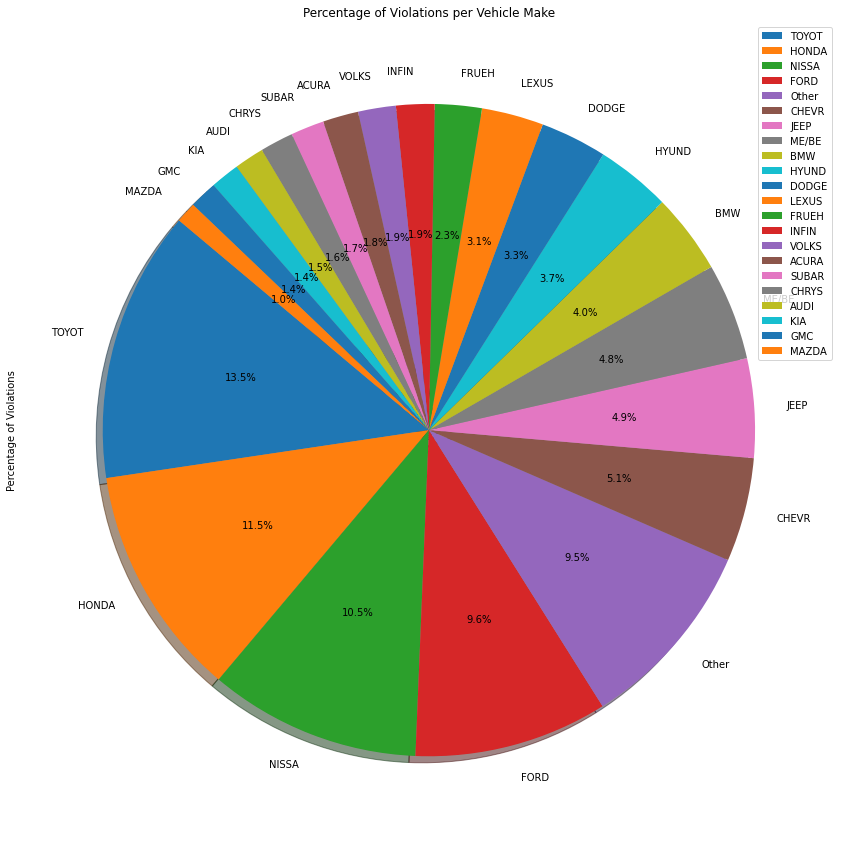

In [77]:
#Plot a Pie Graph with how many violations each vehicle make receives

#Set the Parameters for the Plot Function
title = "Percentage of Violations per Vehicle Make"
y_axis = "Percentage of Violations"
#explode = (0.1, 0)

#Create the Pie Graph
combinedMakeViolations_df.plot.pie(y = y_axis, title = title, figsize = (15,15), startangle = 140, shadow = True, autopct = "%1.1f%%")
#Calculate statistical data to see if there is any significance with this data

<BarContainer object of 22 artists>

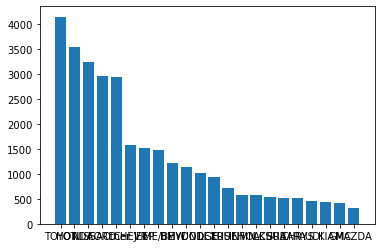

In [ ]:
#Plot a bar graph with how many violations each color receives
combinedMakeViolations_df = combinedMakeViolations_df.reset_index()
plt.bar(combinedMakeViolations_df["Vehicle Make"], combinedMakeViolations_df["Total Violations"])
#Calculate statistical data to see if there is any significance with this data